# Relatorio do Trabalho 2

#### Professor: Ivan Robert Enriquez Guzman

#### Alunos:
- Hugo Batista da Silva
- João Paulo de Paiva Holz

## Introdução
### Sobre o dataset

#### Fonte: [Dados de tempo Inmet - Kaggle](https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region)



### Dados que utilizaremos

Temperatura Máxima


## Importando Bibliotecas

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
#from jh_utils.data.pandas.preprocessing import make_dummies
from get_df import get_data_for_ml,keep_cols,small_column_names_for_mldf
from plot import lines_plot, columnX, plot_ccf_sm, cross_plots
import seaborn as sns
import statsmodels.tsa.stattools as smt
from get_df import get_data_for_ml,keep_cols, get_data, get_dfs_for_ml
from itertools import combinations,permutations

## Importando Dados

In [65]:
df,df_just_stocastic = get_dfs_for_ml('temperatura maxima na hora ant.')
_,precipitacao = get_dfs_for_ml()
precipitacao.columns = precipitacao.columns + '_prec'
precipitacao = precipitacao.iloc[:,1:]
variables = pd.concat([df_just_stocastic.iloc[:,1:],precipitacao],axis=1)

/home/joaoholz/Documents/LSTAT/joao/trabalho2/get_df.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date_time.dt.weekofyear
/home/joaoholz/Documents/LSTAT/joao/trabalho2/get_df.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date_time.dt.weekofyear


## EDA

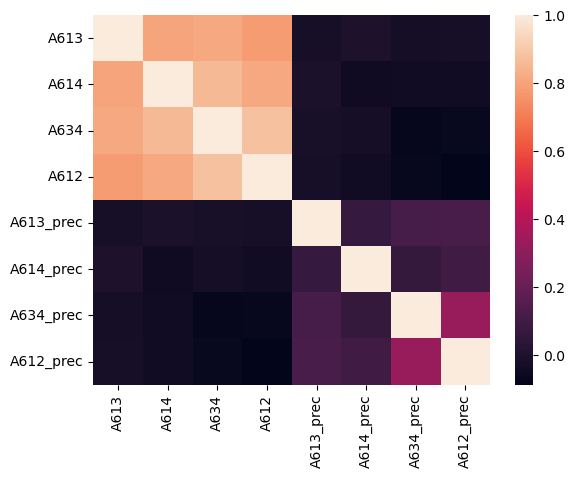

In [66]:
_ = sns.heatmap(variables.corr())

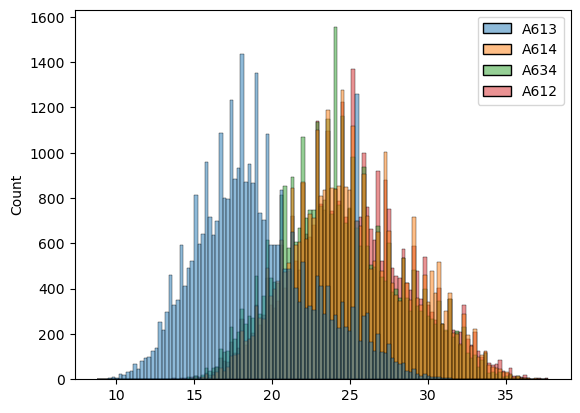

In [67]:
_ = sns.histplot(df_just_stocastic)

In [9]:
_ = lines_plot(df_just_stocastic,['A612','A613','A614','A634'],freq='D')

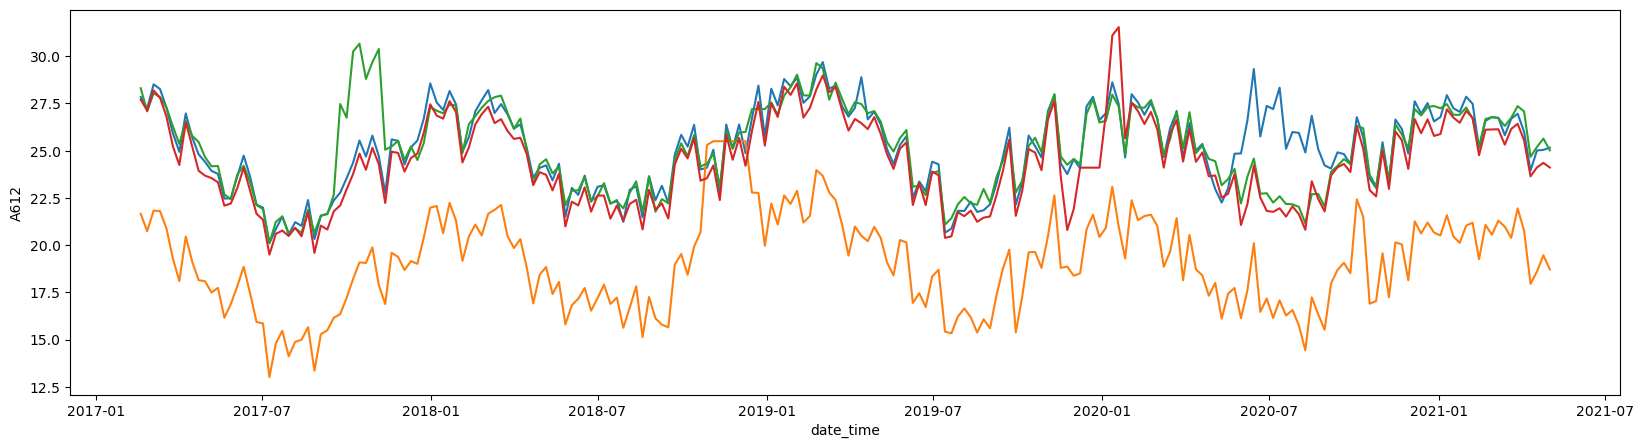

In [10]:
_ = lines_plot(df_just_stocastic,['A612','A613','A614','A634'],freq='w')

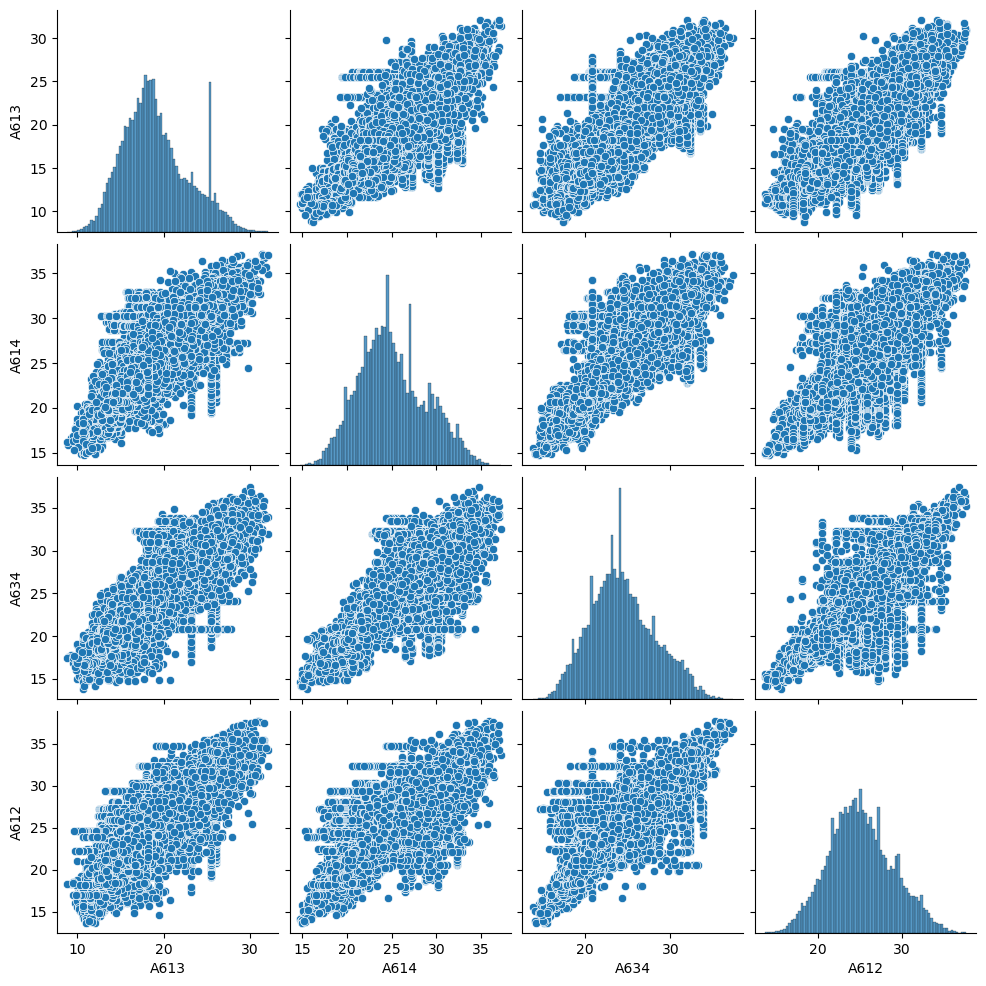

In [12]:
sns.pairplot(df_just_stocastic)

## Modelo
Para montarmos o nosso modelo vamos utilizar acfs e pacfs e cross correlation para viabilizar o uso de um modelo VAR

### ACFS

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

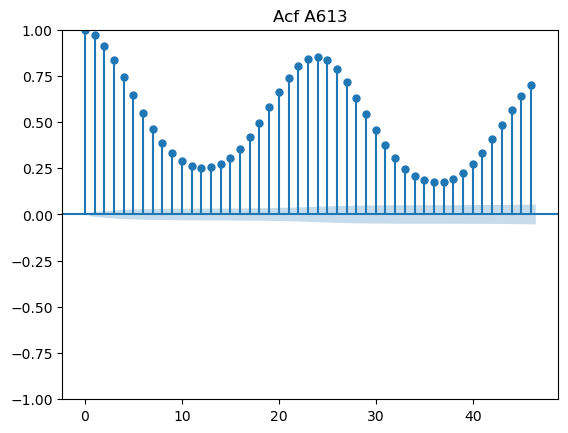

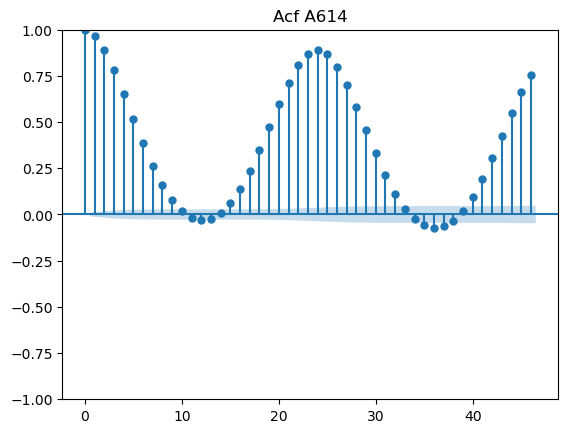

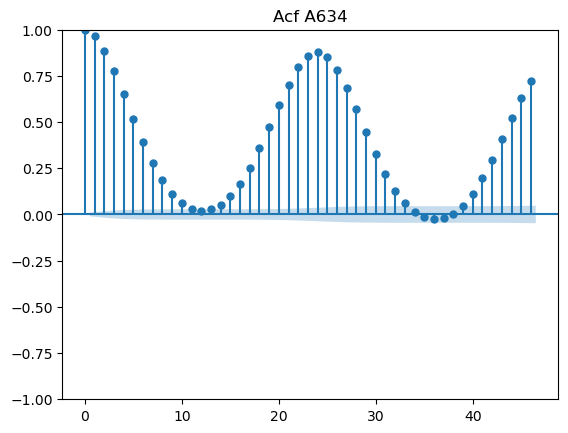

In [43]:
_ = plot_acf(df_just_stocastic.iloc[:,1])
_ = plt.title('Acf '+ df_just_stocastic.columns[1])
_ = plot_acf(df_just_stocastic.iloc[:,2])
_ = plt.title('Acf '+ df_just_stocastic.columns[2])
_ = plot_acf(df_just_stocastic.iloc[:,3])
_ = plt.title('Acf '+ df_just_stocastic.columns[3])
_ = plot_acf(df_just_stocastic.iloc[:,4])
_ = plt.title('Acf '+ df_just_stocastic.columns[4])

### PACFS

/home/joaoholz/miniconda3/envs/lestat/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


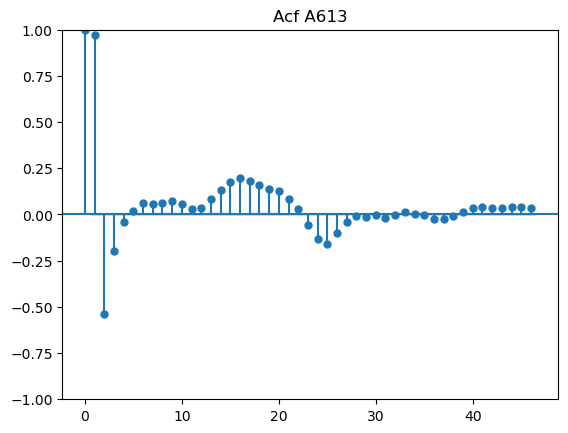

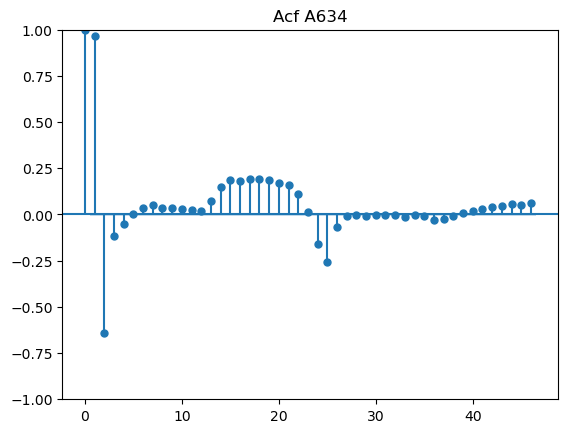

In [44]:
_ = plot_pacf(df_just_stocastic.iloc[:,1])
_ = plt.title('Acf '+ df_just_stocastic.columns[1])
_ = plot_pacf(df_just_stocastic.iloc[:,2])
_ = plt.title('Acf '+ df_just_stocastic.columns[2])
_ = plot_pacf(df_just_stocastic.iloc[:,3])
_ = plt.title('Acf '+ df_just_stocastic.columns[3])
_ = plot_pacf(df_just_stocastic.iloc[:,4])
_ = plt.title('Acf '+ df_just_stocastic.columns[4])

### Cross Correlation

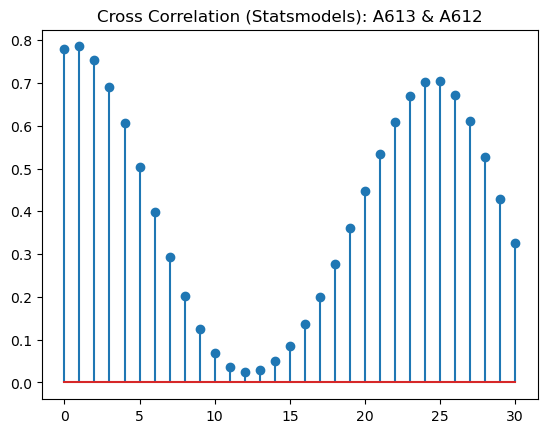

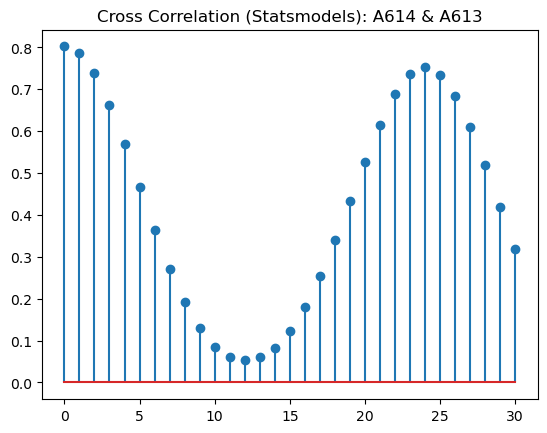

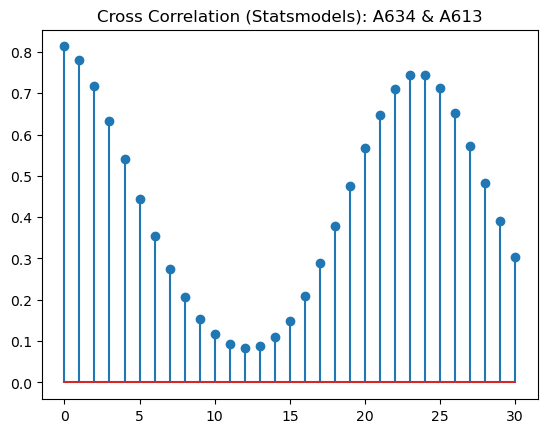

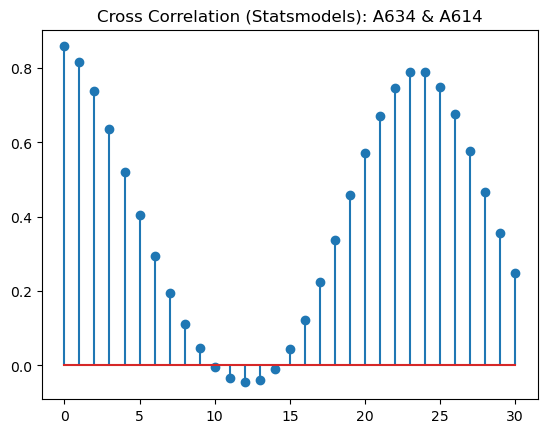

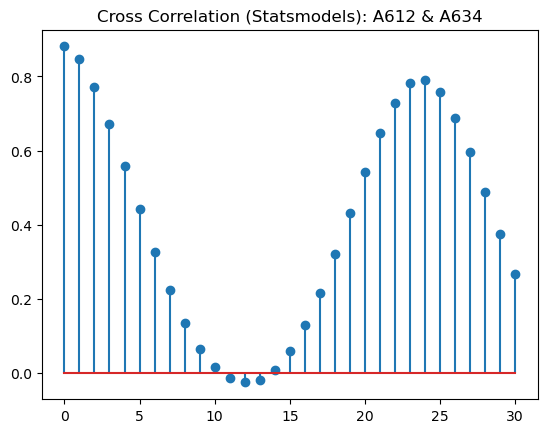

In [27]:
cross_plots(df_just_stocastic.iloc[:,1:])

## Modelo

In [45]:
from statsmodels.tsa.api import VAR

In [63]:
def divide_ts(data,perc = 0.8):
    value = int((data.shape)[0]*0.8)
    return data.iloc[:value],data.iloc[value:]

x,y = divide_ts(variables)

In [78]:
model = VAR(variables.iloc[:,:4],variables.iloc[:,4:])
fit = model.fit(maxlags=8)
fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 31, Jan, 2023
Time:                     18:11:55
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -2.89225
Nobs:                     36820.0    HQIC:                  -2.91559
Log likelihood:          -154957.    FPE:                  0.0535859
AIC:                     -2.92647    Det(Omega_mle):       0.0533711
--------------------------------------------------------------------
Results for equation A613
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.552865         0.033953           16.283           0.000
A613_prec        -0.028028         0.003088           -9.077           0.000
A614_prec         0.007282         0.003655            1.992           0.046


## Conclusão

Modelo mt grande